In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import plotly as py
import plotly.graph_objs as go
from sklearn.cluster import KMeans 


In [8]:
# Carregando a base de dados:
df = pd.read_csv('cluster_clientes.csv', dtype={'codcfo': str})

In [9]:
# Verificando os dados:
df.head()

,codcfo,valorm2
0,00003192,21.03
1,00003222,21.16
2,00003231,22.22
3,00003199,22.22
4,00004433,22.25


In [10]:
# Número de linhas e colunas:
df.shape

(16094, 2)

In [11]:
# Estatística Descritiva:
df.describe()

,valorm2
count,16094.000000
mean,254.157900
std,112.250889
min,21.030000
25%,162.882500
50%,246.215000
75%,345.000000
max,999.800000


In [12]:
# Tipos de Dados:
df.dtypes

codcfo      object
valorm2    float64
dtype: object

In [13]:
# Verificando registros nulos:
df.isnull().sum()

codcfo     0
valorm2    0
dtype: int64

In [17]:
# Selecionando o número de clusters através do método Elbow (Soma das distâncias quadráticas intra clusters):
X2 = df[['valorm2']].iloc[: , :].values
inertia = []
for n in range(1 , 11):
    algorithm = (KMeans(n_clusters = n))
    algorithm.fit(X2)
    inertia.append(algorithm.inertia_)

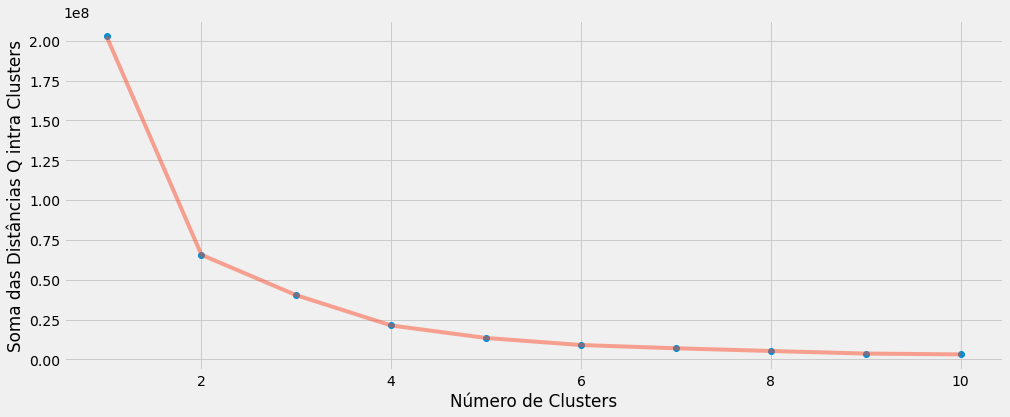

In [18]:
plt.figure(1 , figsize = (15 ,6))
plt.plot(np.arange(1 , 11) , inertia , 'o')
plt.plot(np.arange(1 , 11) , inertia , '-' , alpha = 0.5)
plt.xlabel('Número de Clusters') , plt.ylabel('Soma das Distâncias Q intra Clusters')
plt.show()

In [19]:
# Inicializando e Computando o KMeans com o valor de 4 clusters:
algorithm = (KMeans(n_clusters = 3))
algorithm.fit(X2)

# Saída:
KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

KMeans(n_clusters=3, n_jobs=None, precompute_distances=&#39;auto&#39;)

In [20]:
df["clusters"] = algorithm.labels_
df.head()

,codcfo,valorm2,clusters
0,00003192,21.03,0
1,00003222,21.16,0
2,00003231,22.22,0
3,00003199,22.22,0
4,00004433,22.25,0


In [21]:
# Excluindo as colunas que não foram utilizadas:
df_group = df.drop(['codcfo'],axis=1).groupby("clusters")

In [22]:
# Estatística descritiva dos grupos:
df_group.describe()

valorm2                                                          \
           count        mean        std     min     25%      50%     75%   
clusters                                                                   
0         7084.0  151.947442  38.973095   21.03  129.67  149.965  185.00   
1         6263.0  296.100877  37.399691  223.94  267.00  295.000  342.52   
2         2747.0  422.112039  86.918174  360.44  387.61  395.000  433.00   

                  
             max  
clusters          
0         223.83  
1         357.34  
2         999.80

Text(0.5, 1.0, &#39;Gastos por m2 por Cluster de Clientes&#39;)

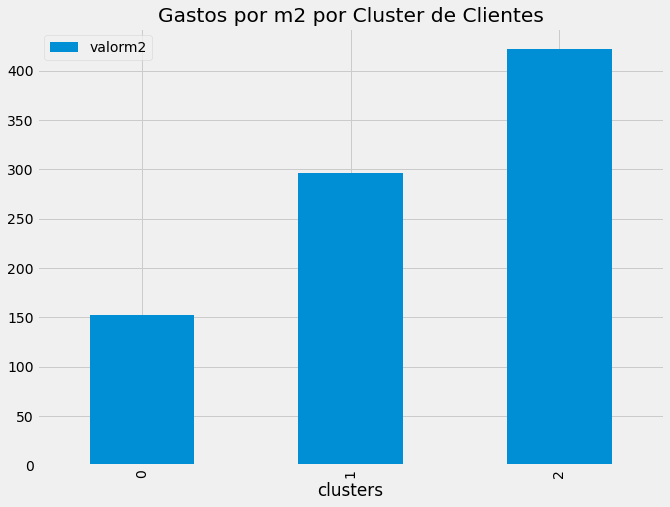

In [23]:
df.groupby("clusters").aggregate("mean").plot.bar(figsize=(10,7.5))
plt.title("Gastos por m2 por Cluster de Clientes")